<a href="https://colab.research.google.com/github/WhatNowKhush/screwed/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd

# Load the dataset (upload Titanic dataset)
from google.colab import files
uploaded = files.upload()

# Read the uploaded file
data = pd.read_csv(next(iter(uploaded)))

# Display first few rows
print(data.head())

# Display column info
print(data.info())


Saving titanic - train.csv to titanic - train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

In [4]:
#Step 2: Data Cleaning

In [6]:
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
data_cleaned = data.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])

# Handle missing values for 'Age'
imputer_age = SimpleImputer(strategy='mean')
data_cleaned['Age'] = imputer_age.fit_transform(data_cleaned[['Age']])

# Ensure 'Embarked' is treated as a categorical column and fill missing values
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna('Missing')  # Replace NaN with 'Missing'

# Check if missing values remain
print(data_cleaned.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked'
label_encoder_sex = LabelEncoder()
data_cleaned['Sex'] = label_encoder_sex.fit_transform(data_cleaned['Sex'])

label_encoder_embarked = LabelEncoder()
data_cleaned['Embarked'] = label_encoder_embarked.fit_transform(data_cleaned['Embarked'])

print(data_cleaned.head())  # Preview the dataset after encoding


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         3
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         3
3         1       1    0  35.0      1      0  53.1000         3
4         0       3    1  35.0      0      0   8.0500         3


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale 'Age' and 'Fare'
scaler = StandardScaler()
data_cleaned[['Age', 'Fare']] = scaler.fit_transform(data_cleaned[['Age', 'Fare']])

print(data_cleaned.head())  # Preview the dataset after scaling


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.592481      1      0 -0.502445         3
1         1       1    0  0.638789      1      0  0.786845         0
2         1       3    0 -0.284663      0      0 -0.488854         3
3         1       1    0  0.407926      1      0  0.420730         3
4         0       3    1  0.407926      0      0 -0.486337         3


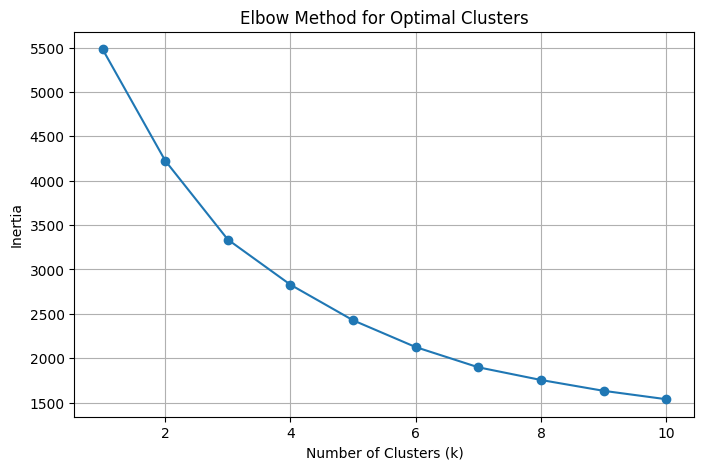

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method for optimal clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_cleaned.drop(columns=["Survived"]))  # Exclude 'Survived'
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:
# Choose the optimal number of clusters based on the elbow curve
optimal_k = 4  # Replace with the actual optimal number you observe
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned.drop(columns=["Survived"]))

print(data_cleaned.head())  # Preview the dataset with cluster labels


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Cluster
0         0       3    1 -0.592481      1      0 -0.502445         3        0
1         1       1    0  0.638789      1      0  0.786845         0        2
2         1       3    0 -0.284663      0      0 -0.488854         3        0
3         1       1    0  0.407926      1      0  0.420730         3        1
4         0       3    1  0.407926      0      0 -0.486337         3        0


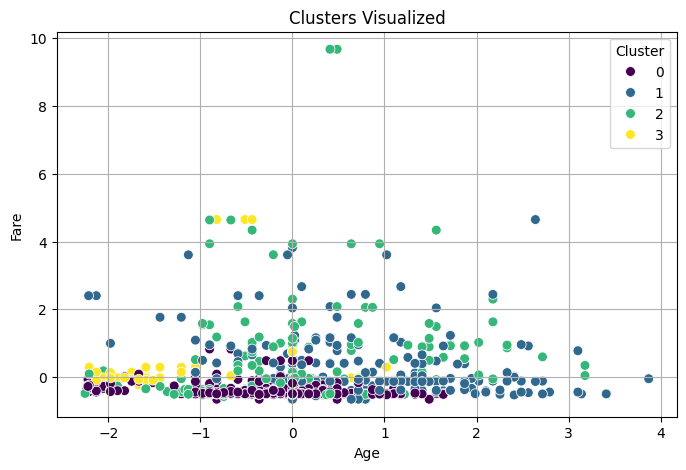

In [11]:
import seaborn as sns

# Visualize clusters (2D scatter plot using two key features)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data_cleaned['Age'], y=data_cleaned['Fare'],
    hue=data_cleaned['Cluster'], palette='viridis', s=50
)
plt.title('Clusters Visualized')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [12]:
# Save the clustered data for analysis
data_cleaned.to_csv('clustered_data.csv', index=False)

# Download the clustered data
from google.colab import files
files.download('clustered_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>